In [1]:
!pip install missingno

In [2]:
#importing main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\Tejes\Downloads\city_day.csv")

In [4]:
data.head()

,State,City,station,StationName,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
data.shape

(29531, 20)

In [6]:
data.columns

Index(['State', 'City', 'station', 'StationName', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<AxesSubplot:>

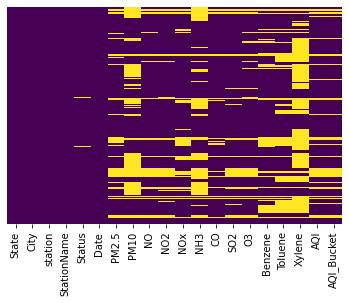

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

In [9]:
null_values_percent=(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
null_values_percent

Xylene         61.322001
PM10           37.723071
NH3            34.973418
Toluene        27.229014
Benzene        19.041008
AQI_Bucket     15.851139
AQI            15.851139
PM2.5          15.570079
NOx            14.171549
O3             13.619586
SO2            13.050692
NO2            12.139785
NO             12.129626
CO              6.972334
Status          1.097152
City            0.000000
Date            0.000000
StationName     0.000000
station         0.000000
State           0.000000
dtype: float64

In [10]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
#Converting dtype of date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data['year'] = data['Date'].apply(lambda x:x.year)
data['month'] = data['Date'].apply(lambda x:x.month)
data['day'] = data['Date'].apply(lambda x:x.day)

In [13]:
data=data.drop(['Date','station','StationName','Status'],axis=1)

In [14]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day'],
      dtype='object')

In [15]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


In [16]:
data.iloc[:,2:14]=data.groupby('City').transform(lambda x:x.fillna(x.mean()))

In [17]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


<AxesSubplot:>

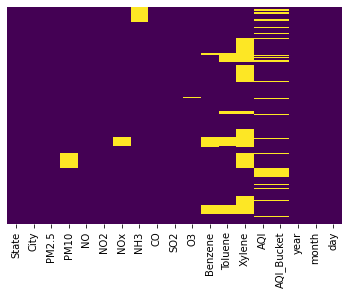

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.loc[:,2:14]=data.fillna(data.mean())

In [20]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


In [21]:
data.tail()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
29526,Andhra Pradesh,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,Good,2020,6,27
29527,Andhra Pradesh,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,Satisfactory,2020,6,28
29528,Andhra Pradesh,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,Satisfactory,2020,6,29
29529,Andhra Pradesh,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0,Satisfactory,2020,6,30
29530,Andhra Pradesh,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,3.891348,8.350983,2.790456,50.0,Good,2020,1,7


<AxesSubplot:>

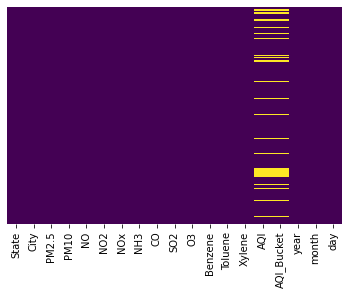

In [22]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
#PM10 sub_index calculation
def get_PM10_subindex(x):
    if x<=50:
        return x
    elif x>50 and x<=100:
        return x
    elif x>100 and x<=250:
        return 100+(x-100)*100/150
    elif x>250 and x<=350:
        return 200+(x-250)
    elif x>350 and x<=430:
        return 300+(x-350)*100/80
    elif x>430:
        return 400+(x-430)*100/80
    else:
        return 0
data['PM10_subindex']=data['PM10'].astype(int).apply(lambda x:get_PM10_subindex(x))
d1=data[['PM10','PM10_subindex']]
d1.head()
    
    

,PM10,PM10_subindex
0,114.584029,109.333333
1,114.584029,109.333333
2,114.584029,109.333333
3,114.584029,109.333333
4,114.584029,109.333333


In [24]:
def get_PM25_subindex(x):
    if x<=30:
        return x*50/30
    elif x>30 and x<=60:
        return 50+(x-30)*50/30
    elif x>60 and x<=90:
        return 100+(x-60)*100/30
    elif x>90 and x<=120:
        return 200+(x-90)*100/30
    elif x>120 and x<=250:
        return 300+(x-120)*100/130
    elif x>250:
        return 400+(x-250)*100/130
    else:
        return 0
data['PM2.5_subindex']=data['PM2.5'].astype(int).apply(lambda x:get_PM25_subindex(x))
    

In [25]:
def get_SO2_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=380:
        return 100+(x-80)*100/300
    elif x>380 and x<=800:
        return 200+(x-380)*100/420
    elif x>800 and x<=1600:
        return 300+(x-800)*100/800
    elif x>1600:
        return 400+(x-1600)*100/800
    else:
        return 0
data['SO2_subindex']=data['SO2'].astype(int).apply(lambda x:get_SO2_subindex(x))

In [26]:
def get_NOx_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=180:
        return 100+(x-80)*100/100
    elif x>180 and x<=280:
        return 200+(x-180)*100/100
    elif x>280 and x<=400:
        return 300+(x-280)*100/120
    elif x>400:
        return 400+(x-400)*100/120
    else:
        return 0
data['NOx_subindex']=data['NOx'].astype(int).apply(lambda x:get_NOx_subindex(x))

In [27]:
def get_NH3_subindex(x):
    if x<=200:
        return x*50/200
    elif x>200 and x<=400:
        return 50+(x-200)*50/200
    elif x>400 and x<=800:
        return 100+(x-400)*100/400
    elif x>800 and x<=1200:
        return 200+(x-800)*100/400
    elif x>1200 and x<=1800:
        return 300+(x-1200)*100/600
    elif x>1800:
        return 400+(x-1800)*100/600
    else:
        return 0
data['NH3_subindex']=data['NH3'].astype(int).apply(lambda x:get_NH3_subindex(x))

In [28]:
def get_CO_subindex(x):
    if x<=1:
        return x*50/1
    elif x>1 and x<=2:
        return 50+(x-1)*50/1
    elif x>2 and x<=10:
        return 100+(x-2)*100/8
    elif x>10 and x<=17:
        return 200+(x-10)*100/7
    elif x>17 and x<=34:
        return 300+(x-17)*100/17
    elif x>34:
        return 400+(x-34)*100/17
    else:
        return 0
data['CO_subindex']=data['CO'].astype(int).apply(lambda x:get_CO_subindex(x))

In [29]:
def get_O3_subindex(x):
    if x<=50:
        return x*50/50
    elif x>50 and x<=100:
        return 50+(x-50)*50/50
    elif x>100 and x<=168:
        return 100+(x-100)*100/68
    elif x>168 and x<=208:
        return 200+(x-168)*100/40
    elif x>208 and x<=748:
        return 300+(x-208)*100/539
    elif x>748:
        return 400+(x-400)*100/539
    else:
        return 0
data['O3_subindex']=data['O3'].astype(int).apply(lambda x:get_O3_subindex(x))

In [30]:
data['AQI']=data['AQI'].fillna(round(data[['PM2.5_subindex','PM10_subindex','SO2_subindex','NOx_subindex','NH3_subindex','CO_subindex','O3_subindex']].max(axis=1)))

In [31]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,2015,1,1,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,2015,2,1,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2015,3,1,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,2015,4,1,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2015,5,1,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000


<AxesSubplot:>

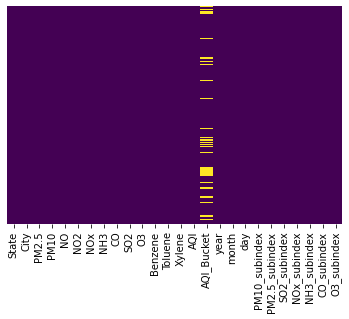

In [32]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
data["AQI_Bucket"] = data["AQI_Bucket"].fillna(data["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [35]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,...,2015,1,1,109.333333,123.333333,33.75,21.25,5.75,0.000000,148.529412
1,Gujarat,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,...,2015,2,1,109.333333,123.333333,30.00,20.00,5.75,0.000000,34.000000
2,Gujarat,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,...,2015,3,1,109.333333,123.333333,36.25,36.25,5.75,300.000000,30.000000
3,Gujarat,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,...,2015,4,1,109.333333,123.333333,22.50,21.25,5.75,50.000000,36.000000
4,Gujarat,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,...,2015,5,1,109.333333,123.333333,48.75,46.25,5.75,329.411765,39.000000


<AxesSubplot:>

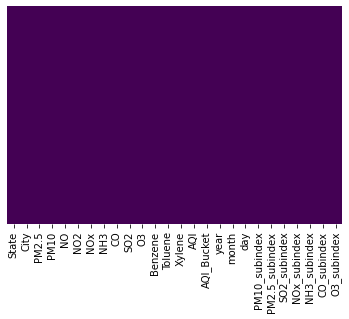

In [36]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

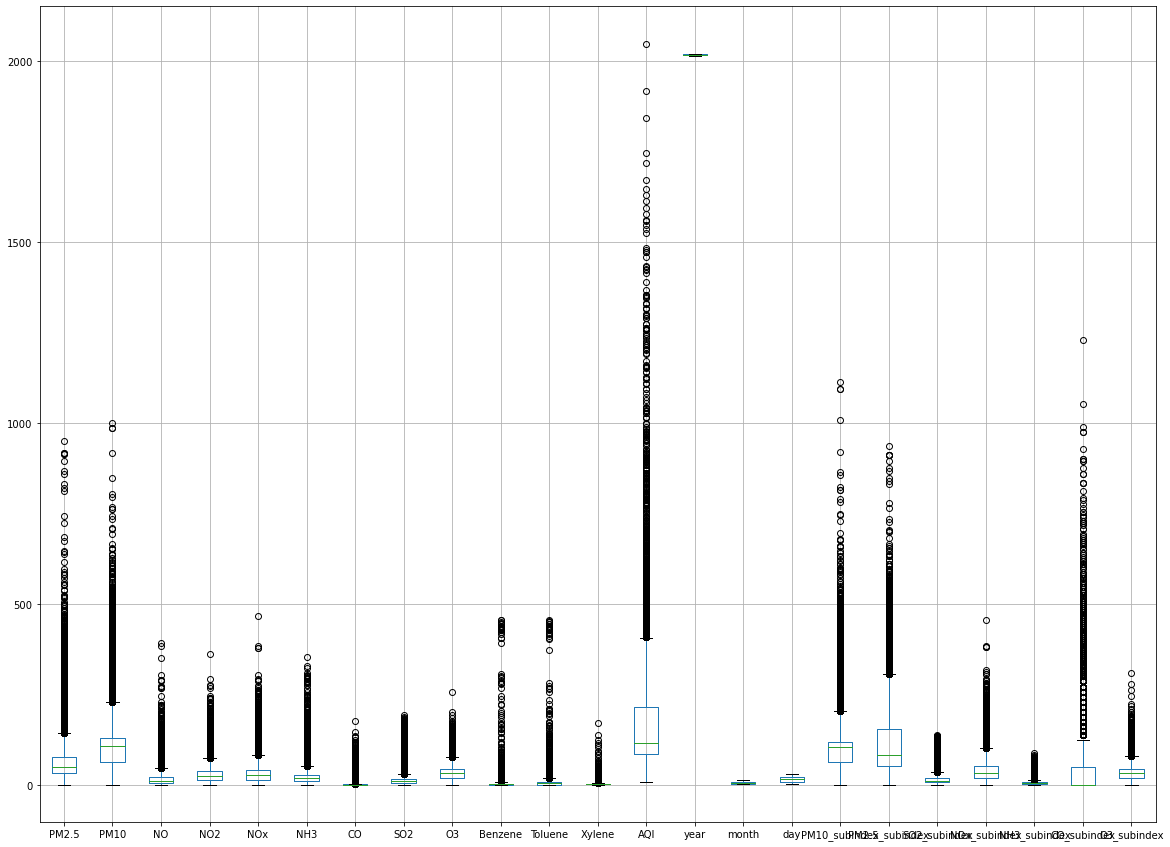

In [37]:
#Finding outliers
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [38]:
#Outliers count in each column
#data=data.drop(['Date'],axis=1)
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               1289
AQI_Bucket           0
Benzene           1639
CO                2922
CO_subindex       2320
City                 0
NH3               2118
NH3_subindex      1979
NO                2021
NO2               1260
NOx               1855
NOx_subindex      1820
O3                1059
O3_subindex        939
PM10              1980
PM10_subindex     1500
PM2.5             2405
PM2.5_subindex    2920
SO2               3443
SO2_subindex      3636
State                0
Toluene           3246
Xylene            1951
day                  0
month                0
year                 0
dtype: int64


In [39]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day', 'PM10_subindex', 'PM2.5_subindex',
       'SO2_subindex', 'NOx_subindex', 'NH3_subindex', 'CO_subindex',
       'O3_subindex'],
      dtype='object')

In [40]:
for features in ['Benzene','CO','NH3','NO','NO2','PM2.5','PM10','NOx','O3','SO2','Toluene','Xylene','AQI','CO_subindex','NH3_subindex','NOx_subindex','O3_subindex','PM10_subindex','PM2.5_subindex','SO2_subindex']:
         OF_Q1=data[features].quantile(0.25)
         OF_Q2=data[features].quantile(0.50)
         OF_Q3=data[features].quantile(0.75)
         OF_IQR=OF_Q3-OF_Q1
         OF_low_limit=OF_Q1-1.5*OF_IQR
         OF_up_limit=OF_Q3+1.5*OF_IQR
         OF_outlier=data[(data[features]<OF_low_limit)|(data[features]>OF_low_limit)]
         data[features]=data[features].clip(OF_up_limit,OF_low_limit)

In [41]:
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               0
AQI_Bucket        0
Benzene           0
CO                0
CO_subindex       0
City              0
NH3               0
NH3_subindex      0
NO                0
NO2               0
NOx               0
NOx_subindex      0
O3                0
O3_subindex       0
PM10              0
PM10_subindex     0
PM2.5             0
PM2.5_subindex    0
SO2               0
SO2_subindex      0
State             0
Toluene           0
Xylene            0
day               0
month             0
year              0
dtype: int64


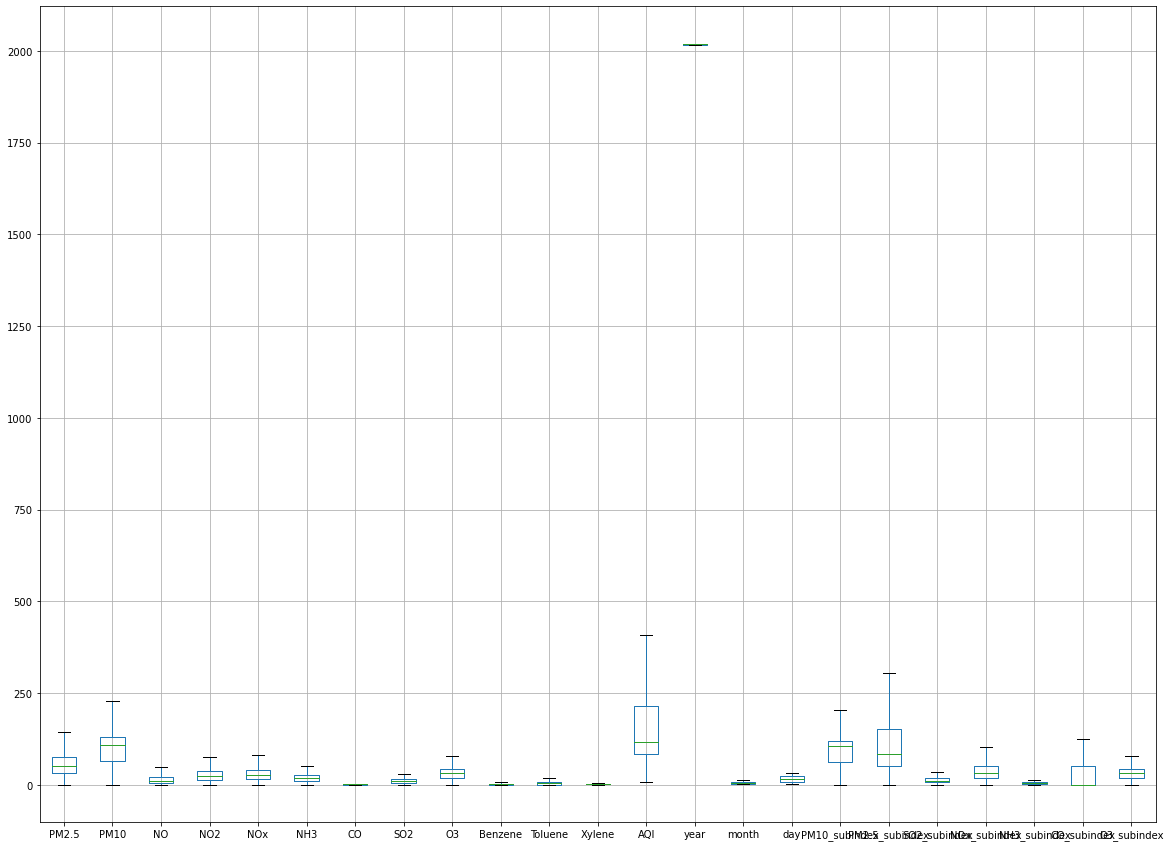

In [42]:
#Finding outliers
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [43]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day', 'PM10_subindex', 'PM2.5_subindex',
       'SO2_subindex', 'NOx_subindex', 'NH3_subindex', 'CO_subindex',
       'O3_subindex'],
      dtype='object')

In [44]:
data['State'].unique()

array(['Gujarat', 'Mizoram', 'Andhra Pradesh', 'Punjab', 'Karnataka',
       'Madhya Pradesh', 'Odisha', 'Chandigarh', 'Tamilnadu', 'Delhi',
       'Kerala', 'Haryana', 'Assam', 'Telengana', 'Rajasthan',
       'Jharkhand', 'kerala', 'West Bengal', 'Uttar Pradesh',
       'Maharashtra', 'Bihar', 'Meghalaya'], dtype=object)

In [45]:
data['State'].nunique()

22

In [46]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [47]:
data['City'].nunique()

26

In [48]:
data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [49]:
# Target encoding

data['State']=data['State'].map({'Gujarat':0, 'Mizoram':1, 'Andhra Pradesh':2, 'Punjab':3, 'Karnataka':4,
       'Madhya Pradesh':5, 'Odisha':6, 'Chandigarh':7, 'Tamilnadu':8, 'Delhi':9,
       'Kerala':10, 'Haryana':11, 'Assam':12, 'Telengana':13, 'Rajasthan':14,
       'Jharkhand':15, 'kerala':16, 'West Bengal':17, 'Uttar Pradesh':18,
       'Maharashtra':19, 'Bihar':20, 'Meghalaya':21})

data['City']=data['City'].map({'Ahmedabad':0, 'Aizawl':1, 'Amaravati':2, 'Amritsar':3, 'Bengaluru':4,
       'Bhopal':5, 'Brajrajnagar':6, 'Chandigarh':7, 'Chennai':8, 'Coimbatore':9,
       'Delhi':10, 'Ernakulam':11, 'Gurugram':12, 'Guwahati':13, 'Hyderabad':14,
       'Jaipur':15, 'Jorapokhar':16, 'Kochi':17, 'Kolkata':18, 'Lucknow':19, 'Mumbai':20,
       'Patna':21, 'Shillong':22, 'Talcher':23, 'Thiruvananthapuram':24,
       'Visakhapatnam':25})



In [50]:
data.tail()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
29526,2,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,...,2020,6,27,50.0,25.000000,10.00,23.75,3.00,0.0,23.0
29527,2,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,...,2020,6,28,74.0,40.000000,15.00,20.00,2.75,0.0,30.0
29528,2,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,...,2020,6,29,65.0,36.666667,10.00,22.50,2.50,0.0,30.0
29529,2,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,...,2020,6,30,49.0,26.666667,11.25,22.50,2.50,0.0,28.0
29530,2,25,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,...,2020,1,7,66.0,25.000000,2.50,17.50,1.25,0.0,17.0


In [51]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,0,0,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.920,27.6400,...,2015,1,1,109.333333,123.333333,33.750,21.25,5.75,0.0,79.0
1,0,0,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.970,24.5500,...,2015,2,1,109.333333,123.333333,30.000,20.00,5.75,0.0,34.0
2,0,0,67.854497,114.584029,17.40,19.30,29.70,23.024137,3.015,29.0700,...,2015,3,1,109.333333,123.333333,35.625,36.25,5.75,125.0,30.0
3,0,0,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.700,18.5900,...,2015,4,1,109.333333,123.333333,22.500,21.25,5.75,50.0,36.0
4,0,0,67.854497,114.584029,22.10,21.42,37.76,23.024137,3.015,30.7575,...,2015,5,1,109.333333,123.333333,35.625,46.25,5.75,125.0,39.0


In [52]:
data['AQI_Bucket'].value_counts()

Moderate        10344
Satisfactory     9800
Very Poor        3338
Poor             3121
Good             1539
Severe           1389
Name: AQI_Bucket, dtype: int64

In [53]:
#Feature Engineering
#data['BTX'] = data["Benzene"]+data["Toluene"]+data["Xylene"]
#data['PM'] =data["PM2.5"]+data["PM10"]
y=data['AQI']
X = data[['State','City','year', 'month',]]

In [54]:
#splitting of data

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [56]:
!pip install nestedhyperboost

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor

In [58]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    '       XGBoost Regressor' : XGBRegressor(),
    '    XGBoost RF Regressor' : XGBRFRegressor(),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
    ' Light Gradient Boosting' : LGBMRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.
          Neural Network trained.
           Random Forest trained.
                Catboost trained.
       XGBoost Regressor trained.
    XGBoost RF Regressor trained.
Linear Regression(lasso) trained.
       Linear Regression trained.
 Light Gradient Boosting trained.


In [59]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [60]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 100.18
          Neural Network RMSE: 91.42
           Random Forest RMSE: 65.47
                Catboost RMSE: 64.70
       XGBoost Regressor RMSE: 64.84
    XGBoost RF Regressor RMSE: 72.25
Linear Regression(lasso) RMSE: 100.16
       Linear Regression RMSE: 100.18
 Light Gradient Boosting RMSE: 64.86


In [61]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))

Linear Regression(Ridge) R^2: 0.06674
          Neural Network R^2: 0.22281
           Random Forest R^2: 0.60137
                Catboost R^2: 0.61077
       XGBoost Regressor R^2: 0.60907
    XGBoost RF Regressor R^2: 0.51457
Linear Regression(lasso) R^2: 0.06706
       Linear Regression R^2: 0.06674
 Light Gradient Boosting R^2: 0.60879


In [63]:
X.tail()

,State,City,year,month
29526,2,25,2020,6
29527,2,25,2020,6
29528,2,25,2020,6
29529,2,25,2020,6
29530,2,25,2020,1


In [64]:
#LGBMRegressor

In [65]:
lgbm = LGBMRegressor()
model=lgbm.fit(X_train, y_train)
lgbm_pred = model.predict(X_test)
mse(y_test, lgbm_pred, squared=False)

64.86039802619511

In [66]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test, lgbm_pred)
r_square

0.608789764480526

In [67]:
results = pd.DataFrame({'Model': [ 'Linear Regression(Ridge)','Neural Network','Random Forest','Catboost','XGBoost Regressor',' XGBoost RF Regressor', 
                                   'Linear Regression(lasso)',' Linear Regression','Light Gradient Boosting','LGBMRegressor'], 
                        'Score': [0.81378,0.89705,0.91448,0.92080,0.91505,0.90051,0.81371,0.81378,0.91776,.9177]})

                                  
                        

result_df = results.sort_values(by='Score', ascending=False)

result_df

,Model,Score
3,Catboost,0.92080
8,Light Gradient Boosting,0.91776
9,LGBMRegressor,0.91770
4,XGBoost Regressor,0.91505
2,Random Forest,0.91448
5,XGBoost RF Regressor,0.90051
1,Neural Network,0.89705
0,Linear Regression(Ridge),0.81378
7,Linear Regression,0.81378
6,Linear Regression(lasso),0.81371


No handles with labels found to put in legend.


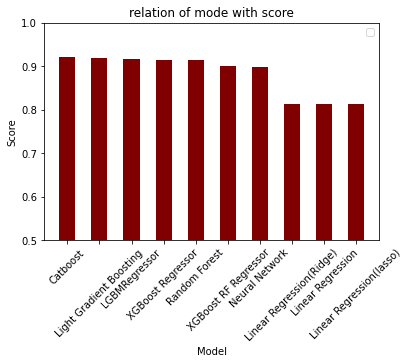

In [68]:
plt.bar(result_df['Model'],result_df['Score'], color = 'maroon',width=.5)
plt.title('relation of mode with score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.ylim(.5,1)
plt.legend()
plt.show()

In [69]:
#prediction

In [70]:
x_predict = [0,0,2020,1]
import numpy as np
x_predict = np.array(x_predict).reshape(1,-1)

In [71]:
predicted_value = lgbm.predict(x_predict) 
print("Predicted value : ",predicted_value)

Predicted value :  [311.44509441]


In [75]:
x_predict = [0,25,2025,1]
import numpy as np
x_predict = np.array(x_predict).reshape(1,-1)

In [76]:
predicted_value = lgbm.predict(x_predict) 
print("Predicted value : ",predicted_value)

Predicted value :  [306.24498201]


In [174]:
#hypertuning

In [67]:
#Grid search CV

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,300,500],'max_depth':[1,3,5]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(X_train,y_train)

clf.best_score_

clf.best_params_

model=RandomForestRegressor(max_depth= 5, n_estimators= 500)
model.fit(X_train, y_train)
rf_pred = model.predict(X_test)
mse(y_test, rf_pred, squared=False)

from sklearn.metrics import r2_score
r_square = r2_score(y_test, rf_pred)
r_square

In [ ]:
#Random searchCV

from sklearn.model_selection import RandomizedSearchCV
param={'n_estimators':[100,300,500],'max_depth':[1,3,5]}
rfr=RandomForestRegressor()
rlf=RandomizedSearchCV(rfr,param,n_iter=5)
rlf.fit(X_train,y_train)

rlf.best_score_

rlf.best_params_

rfr=RandomForestRegressor(n_estimators= 300, max_depth= 5)
rlf=RandomizedSearchCV(rfr,param,n_iter=5)
rlf.fit(X_train, y_train)
rlf_pred = model.predict(X_test)
mse(y_test, rlf_pred, squared=False)

from sklearn.metrics import r2_score
r_square = r2_score(y_test, rlf_pred)
r_square

In [ ]:
#hyper tuning of Lgbm regressor

lgbm = LGBMRegressor()
lgbm.get_params()

lgbm = LGBMRegressor(max_depth=-1, n_estimators= 100)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
mse(y_test, lgbm_pred, squared=False)

from sklearn.metrics import r2_score
r_square = r2_score(y_test, lgbm_pred)
r_square

In [ ]:
#Knn

from sklearn.neighbors import KNeighborsRegressor
Knn=KNeighborsRegressor()
Knn.fit(X_train,y_train)
predictions = Knn.predict(X_test)

mse(y_test, predictions, squared=False)

from sklearn.metrics import r2_score
r_square = r2_score(y_test, predictions)
r_square

import catboost as cb
model = cb.CatBoostRegressor(loss_function='RMSE')
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid,train_dataset)
pred1 = model.predict(X_test)



from sklearn.metrics import r2_score
r_square = r2_score(y_test, pred1)
r_square

mse(y_test, pred1, squared=False)

In [91]:
import pickle

In [99]:
pickle.dump(data,open(r"C:/Users/Tejes/Downloads/Air_quality_pred/data.pkl",'wb'))

In [93]:
pickle.dump(predicted_value,open('predicted_value.pkl','wb'))

In [98]:
pickle.dump(model,open(r"C:/Users/Tejes/Downloads/Air_quality_pred/model.pkl",'wb'))

In [95]:
data['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [96]:
x_predict = [4,4,2025,6]
import numpy as np
x_predict = np.array(x_predict).reshape(1,-1)
predicted_value = model.predict(x_predict) 
print("Predicted value : ",predicted_value)


Predicted value :  [68.29774549]
